<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%B4_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : LSTM을 활용해 주가 예측 모델 구현하기

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

In [ ]:
# 파이프라인 : 하나의 시스템을 이용하기 위해서 여러개의 경로 ??
# 파이프 라인이 3개

## Step 1. 데이터 불러오기 및 EDA

In [ ]:
# explanotiry data analysis

### 문제 01. 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
 # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 
%matplotlib inline 
warnings.filterwarnings('ignore') #ignore warnings message

plt.rcParams['font.family'] = 'NanumGothic'

### 문제 02. FinanceDataReader import

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

### 문제 03. 삼성전자 데이터 불러오기

In [ ]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

### 문제 04. 삼성전자 데이터 EDA

In [ ]:
samsung.tail() # 5개 나옴

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-01,63100,63200,62300,62600,16631445,0.006431
2022-12-02,62500,62500,60400,60400,15331184,-0.035144
2022-12-05,60900,61100,60000,60300,13767787,-0.001656
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,59200,8669544,0.000000


**미국 주식 데이터**도 가져올 수 있습니다.

### 문제 05. 애플 데이터 불러오기

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

### 문제 06. 애플 데이터 EDA

In [ ]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


### 문제 07. 특정 시점(2017년) 이후 데이터 불러오기

In [ ]:
# Apple(AAPL), 2017년
apple = fdr.DataReader('AAPL', '2017')

In [ ]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64671400


### 문제 08. 날짜를 지정하여 특정 범위(40년간) 데이터 불러오기

In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [ ]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,1.297609,1.328022,1.287471,1.287471,0.265383,2044376
1980-01-03,1.287471,1.287471,1.267196,1.287471,0.265383,2816257
1980-01-04,1.287471,1.287471,1.272265,1.277334,0.263294,3038203
1980-01-07,1.277334,1.287471,1.267196,1.267196,0.261204,2251526
1980-01-08,1.267196,1.292540,1.257059,1.292540,0.266428,4069022


In [ ]:
ford.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,9.50,9.54,9.44,9.48,8.981936,50191200
2019-12-23,9.50,9.57,9.40,9.44,8.944039,54784400
2019-12-24,9.44,9.49,9.43,9.47,8.972464,11881600
2019-12-26,9.47,9.49,9.43,9.45,8.953514,28961300
2019-12-27,9.45,9.46,9.35,9.36,8.868243,28272800


### 문제 09. '금'과 '달러' 데이터도 가져올 수 있습니다. 두 데이터를 불러와 head를 출력해보세요.

*[GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader) 참고

In [ ]:
gold = fdr.DataReader('ZG') # 금 선물 (ICE)
gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,34.970001,37.450001,34.770000,37.400002,37.400002,793100
2022-12-01,37.119999,38.020000,37.040001,37.919998,37.919998,947700
2022-12-02,37.540001,38.419998,37.290001,38.189999,38.189999,509600
2022-12-05,37.880001,38.759998,36.950001,37.060001,37.060001,393700
2022-12-06,37.150002,37.150002,35.980000,36.360001,36.360001,553700


In [ ]:
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01')
usdkrw.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,1279.800049,1308.020020,1281.199951,1279.800049,1279.800049,0.0
2022-12-02,1303.250000,1307.939941,1294.910034,1303.250000,1303.250000,0.0
2022-12-05,1299.170044,1304.099976,1288.709961,1299.170044,1299.170044,0.0
2022-12-06,1304.369995,1322.439941,1301.069946,1304.369995,1304.369995,0.0
2022-12-07,1319.739990,1325.880005,1314.150024,1314.209961,1314.209961,0.0


### 문제 10. 주식 코드를 활용해 데이터 불러오기

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
# fdr 라이브러리를 활용해 삼성전자 데이터를 불러오세요 
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-08,929,948,885,887,618950,NaN
1998-09-09,898,909,854,873,647890,-0.015784
1998-09-10,862,871,846,872,1144380,-0.001145
1998-09-11,837,850,814,814,588820,-0.066514
1998-09-12,823,829,806,816,326350,0.002457


In [ ]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-01,63100,63200,62300,62600,16631445,0.006431
2022-12-02,62500,62500,60400,60400,15331184,-0.035144
2022-12-05,60900,61100,60000,60300,13767787,-0.001656
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,59100,8674320,-0.001689


In [ ]:
# 인덱스를 확인해보세요.
stock.index

DatetimeIndex(['1998-09-08', '1998-09-09', '1998-09-10', '1998-09-11',
               '1998-09-12', '1998-09-14', '1998-09-15', '1998-09-16',
               '1998-09-17', '1998-09-18',
               ...
               '2022-11-24', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05',
               '2022-12-06', '2022-12-07'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## Step 2. 시계열 데이터 시각화


### 문제 11. 인덱스가 `DatetimeIndex`로 정의되어 있다면, 연도, 월, 일을 쪼갤 수 있습니다. 데이터를 분리해주세요.

In [ ]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-09-08,929,948,885,887,618950,NaN,1998,9,8
1998-09-09,898,909,854,873,647890,-0.015784,1998,9,9
1998-09-10,862,871,846,872,1144380,-0.001145,1998,9,10
1998-09-11,837,850,814,814,588820,-0.066514,1998,9,11
1998-09-12,823,829,806,816,326350,0.002457,1998,9,12


### 문제 12. 연도별, 월별 피봇테이블을 각각 구현해보세요.

In [ ]:
stock.groupby(['Year', 'Month']).mean()

Open          High           Low         Close  \
Year Month                                                           
1998 9        764.200000    778.250000    742.150000    755.950000   
     10       900.083333    929.250000    876.375000    907.000000   
     11      1237.280000   1265.960000   1211.280000   1238.920000   
     12      1409.100000   1462.550000   1366.300000   1418.050000   
1999 1       1753.800000   1783.400000   1700.650000   1740.000000   
...                  ...           ...           ...           ...   
2022 8      60186.363636  60686.363636  59781.818182  60272.727273   
     9      55720.000000  56220.000000  55235.000000  55595.000000   
     10     56563.157895  57384.210526  56026.315789  56710.526316   
     11     61009.090909  61463.636364  60463.636364  61090.909091   
     12     61020.000000  61300.000000  60080.000000  60320.000000   

                  Volume    Change        Day  
Year Month                                     
1998 9      7.850285e+05 -0.009374  18.850000  
     10     1.256900e+06  0.020467  17.666667  
     11     8.211832e+05  0.004558  15.600000  
     12     9.081414e+05  0.011062  12.900000  
1999 1      6.404312e+05  0.007332  16.500000  
...                  ...       ...        ...  
2022 8      1.144006e+07 -0.001209  15.681818  
     9      1.443077e+07 -0.005727  16.600000  
     10     1.718619e+07  0.006090  17.263158  
     11     1.321282e+07  0.002220  15.318182  
     12     1.365861e+07 -0.010060   4.200000  

[292 rows x 7 columns]

### 문제 13. matplotlib을 활용해 시간에 따른 주식 가격 시계열 그래프를 그려보세요.

Text(0, 0.5, 'price')

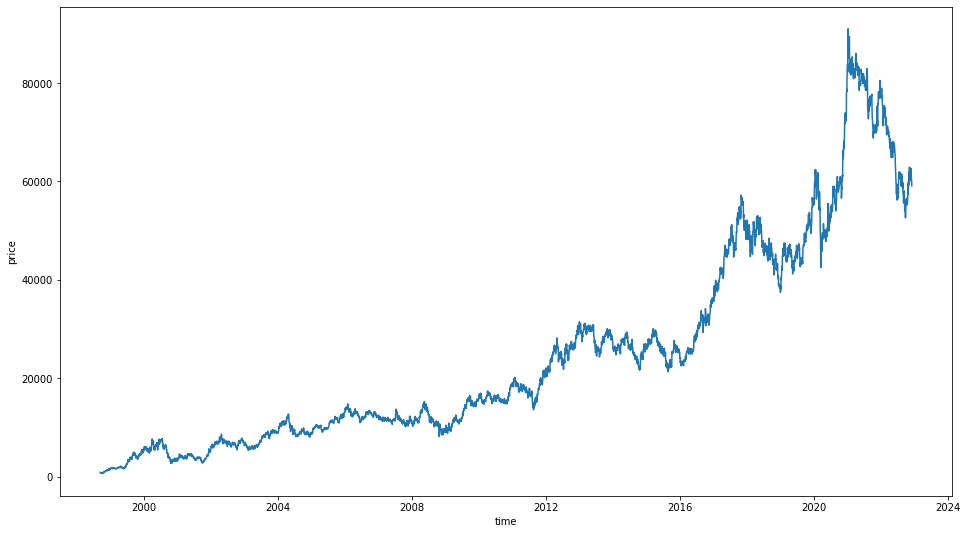

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 문제 14. subplots를 활용해 그래프 4개(2,2)를 동시에 그려보세요.

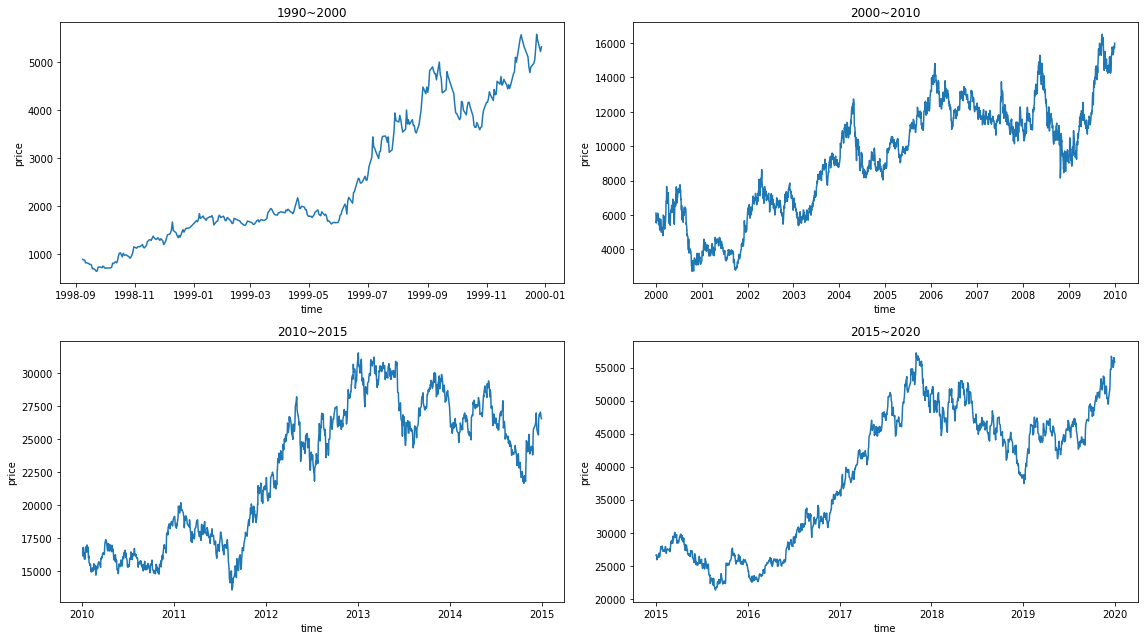

In [ ]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## Step 3. 시계열 데이터의 전처리

### 문제 15. MinMaxScaler를 활요해 데이터 전처리를 수행합니다.

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #0~1
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled
# 칼럼 당 표준화
# transform

array([[0.01028793, 0.00979339, 0.00988827, 0.00275558, 0.00685391],
       [0.00994463, 0.0093905 , 0.0095419 , 0.00260065, 0.00717437],
       [0.00954596, 0.00899793, 0.00945251, 0.00258958, 0.01267222],
       ...,
       [0.6744186 , 0.63119835, 0.67039106, 0.66025542, 0.15245676],
       [0.66223699, 0.62086777, 0.66145251, 0.64808216, 0.15379125],
       [0.65116279, 0.61570248, 0.65363128, 0.6469755 , 0.09605456]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [ ]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

### 문제 16. 모델 학습을 위해 train 데이터와 test 데이터로 분할해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Close 컬럼이 예측할 데이터입니다.
# test_size는 0.2, random_state는 0으로 지정해주세요.
# shuffle을 수행하지 않습니다.
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

### 문제 17. train 데이터와 test 데이터의 shape을 각각 살펴봅니다.

In [ ]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [ ]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [ ]:
x_train

,Open,High,Low,Volume
0,0.010288,0.009793,0.009888,0.006854
1,0.009945,0.009390,0.009542,0.007174
2,0.009546,0.008998,0.009453,0.012672
3,0.009269,0.008781,0.009095,0.006520
4,0.009114,0.008564,0.009006,0.003614
...,...,...,...,...
4795,0.553931,0.516736,0.548156,0.002448
4796,0.553931,0.523140,0.556648,0.003289
4797,0.557918,0.520455,0.547933,0.002042
4798,0.538649,0.502893,0.535866,0.002773


In [ ]:
print(y_train.dtype)

float64


### 문제 18. TensroFlow Dataset을 활용해 시퀀스 데이터셋을 함수로 구현해주세요

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

## Step 4. 모델 구현하기

### 문제 19. Hyperparameter를 정의하고 데이터에 적용해주세요.

window_size : 몇개를 가지고 그 다음것을 예측하겠느냐?


window_size = 1: 하나가지고, 그 다음 것을 예측

window_size=20 :그 이전의 20개의 데이터를 이용하여 예측을 하겠다는 말.

20번째: 1~20 <- ??? 제대로못들음

21번째: 2~21 <- ??? 제대로못들음

batch_size=32: 4800/20 = 240. 240개를 독립적으로, 병렬적으로 돌리겠다는뜻. 메모리에 대한 효율적인 사용ㄴㄴ

In [ ]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용해주세요.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


### 문제 20. Sequential 모델을 구현합니다. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda # time dimension은 1이니까 Conv1D(7,8장에서는 이미지였으니까 Conv2D)
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(1),
])

### 문제 21. 모델을 Compile합니다. loss는 Huber 함수를 사용하고 optimizer는 Adam을 사용해주세요.

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber() # loss는 Huber사용
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=5, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/5
    150/Unknown - 17s 41ms/step - loss: 3.2443e-04 - mse: 6.4885e-04
Epoch 1: val_loss improved from inf to 0.00461, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 17s 45ms/step - loss: 3.2443e-04 - mse: 6.4885e-04 - val_loss: 0.0046 - val_mse: 0.0092
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 3.8642e-05 - mse: 7.7283e-05
Epoch 2: val_loss improved from 0.00461 to 0.00133, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 12s 77ms/step - loss: 3.8642e-05 - mse: 7.7283e-05 - val_loss: 0.0013 - val_mse: 0.0027
Epoch 3/5
150/150 [==============================] - ETA: 0s - loss: 2.8571e-05 - mse: 5.7142e-05
Epoch 3: val_loss improved from 0.00133 to 0.00086, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 10s 62ms/step - loss: 2.8571e-05 - mse: 5.7142e-05 - val_loss: 8.5697e-04 - val_mse: 0.0017
Epoch 4/5
150/150 [==============================] - ETA: 0s -

## Step 5. 모델을 활용한 예측 및 결과 시각화

### 문제 24. 저장한 ModelCheckpoint 를 불러옵니다.

In [ ]:
model.load_weights(filename)

### 문제 25. `test_data`를 활용하여 예측을 수행합니다.

In [ ]:
pred = model.predict(test_data)

37/37 [==============================] - 0s 7ms/step


In [ ]:
pred.shape

(1180, 1)

### 문제 26. matplotlib을 활용해 예측 데이터를 시각화해주세요.

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

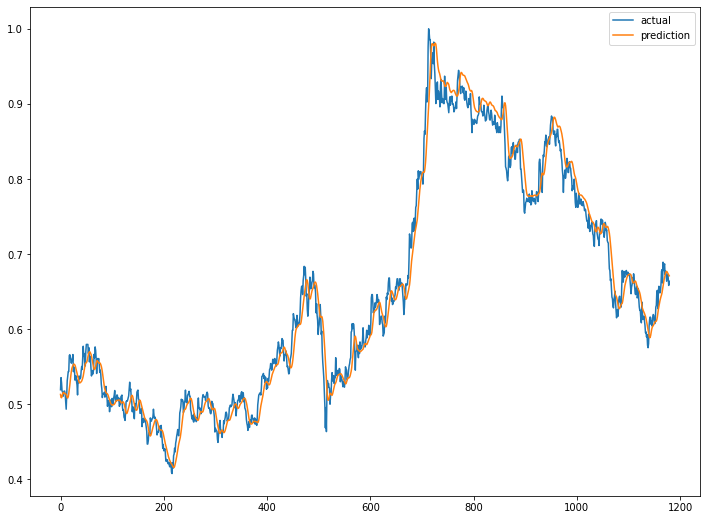

In [ ]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다.
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
pred.shape

(1180, 1)

In [ ]:
y_test.shape

(1200,)

In [ ]:
# 1200개 중에 1180개.
# 처음에 20개는 버렸었음